In [1]:
import tensorflow as tf
import keras

In [2]:
file_path = "https://www.kaggle.com/datasets/parve05/customer-review-dataset"

data_dir = keras.utils.get_file("customer_data" , origin=file_path , untar=True)

In [3]:
len(data_dir)

44

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
pd.read_csv('EW-MAX.csv')

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2000/3/27,3.812500,4.156250,3.812500,4.125000,4.125000,3675600
1,2000/3/28,4.125000,4.125000,4.000000,4.015625,4.015625,1077600
2,2000/3/29,4.000000,4.031250,3.953125,4.000000,4.000000,437200
3,2000/3/30,4.000000,4.000000,3.843750,3.843750,3.843750,1883600
4,2000/3/31,3.734375,3.734375,3.390625,3.390625,3.390625,7931600
...,...,...,...,...,...,...,...
4387,2017/9/1,113.790001,114.099998,112.790001,113.309998,113.309998,950000
4388,2017/9/5,112.519997,113.529999,111.160004,111.870003,111.870003,1805200
4389,2017/9/6,112.029999,112.489998,110.250000,112.230003,112.230003,2136700
4390,2017/9/7,112.459999,112.900002,112.000000,112.339996,112.339996,1251600


In [8]:
df = pd.read_csv('EW-MAX.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4392 entries, 0 to 4391
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4392 non-null   object 
 1   Open       4392 non-null   float64
 2   High       4392 non-null   float64
 3   Low        4392 non-null   float64
 4   Close      4392 non-null   float64
 5   Adj_Close  4392 non-null   float64
 6   Volume     4392 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 240.3+ KB


In [10]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj_Close    0
Volume       0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
a = df[['Open' , 'High' , 'Low']]


In [13]:
sorted_df = df.sort_values('Volume' , ascending=True).head(10)
sorted_df

,Date,Open,High,Low,Close,Adj_Close,Volume
1425,2005/11/25,10.275000,10.352500,10.260000,10.325000,10.325000,190400
104,2000/8/23,5.718750,5.734375,5.640625,5.718750,5.718750,220000
93,2000/8/8,5.671875,5.687500,5.500000,5.625000,5.625000,224000
923,2003/11/28,7.500000,7.582500,7.477500,7.530000,7.530000,224800
1926,2007/11/23,12.282500,12.462500,12.257500,12.422500,12.422500,225600
320,2001/7/3,6.587500,6.637500,6.562500,6.562500,6.562500,226000
322,2001/7/6,6.535000,6.535000,6.370000,6.370000,6.370000,246400
150,2000/10/27,5.828125,5.875000,5.750000,5.750000,5.750000,262000
942,2003/12/26,7.450000,7.500000,7.425000,7.472500,7.472500,263600
116,2000/9/11,5.593750,5.593750,5.531250,5.578125,5.578125,264400


In [14]:
sorted_df = df.sort_values('High' , ascending=True).head(10)
sorted_df

,Date,Open,High,Low,Close,Adj_Close,Volume
153,2000/11/1,3.375000,3.390625,3.000000,3.250000,3.250000,19073200
154,2000/11/2,3.296875,3.562500,3.265625,3.546875,3.546875,3819600
7,2000/4/5,3.468750,3.562500,3.453125,3.484375,3.484375,6349600
166,2000/11/20,3.578125,3.578125,3.390625,3.437500,3.437500,530800
6,2000/4/4,3.531250,3.578125,3.093750,3.500000,3.500000,13136800
8,2000/4/6,3.500000,3.593750,3.468750,3.578125,3.578125,7181200
165,2000/11/17,3.609375,3.609375,3.390625,3.546875,3.546875,1190000
15,2000/4/17,3.578125,3.609375,3.515625,3.562500,3.562500,2992000
16,2000/4/18,3.609375,3.625000,3.484375,3.515625,3.515625,2896000
14,2000/4/14,3.609375,3.625000,3.531250,3.609375,3.609375,2626000


In [15]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,4392.0,3.056254e+01,2.991476e+01,3.296875,8.718125e+00,1.476625e+01,4.254625e+01,1.210800e+02
High,4392.0,3.089362e+01,3.021097e+01,3.390625,8.803125e+00,1.498125e+01,4.305125e+01,1.217500e+02
Low,4392.0,3.023883e+01,2.961576e+01,3.000000,8.625000e+00,1.466250e+01,4.208625e+01,1.201700e+02
Close,4392.0,3.057258e+01,2.990578e+01,3.250000,8.712500e+00,1.476750e+01,4.254000e+01,1.213600e+02
Adj_Close,4392.0,3.057258e+01,2.990578e+01,3.250000,8.712500e+00,1.476750e+01,4.254000e+01,1.213600e+02
Volume,4392.0,1.884027e+06,1.621609e+06,190400.000000,1.088800e+06,1.539300e+06,2.188900e+06,4.641260e+07


In [16]:
df.query("Volume > 1500000").sort_values("Volume" , ascending=False)

,Date,Open,High,Low,Close,Adj_Close,Volume
2770,2011/3/31,44.005001,44.095001,43.360001,43.500000,43.500000,46412600
2103,2008/8/7,14.082500,14.547500,13.437500,14.460000,14.460000,23767600
3288,2013/4/24,33.275002,33.299999,31.750000,32.299999,32.299999,22986800
153,2000/11/1,3.375000,3.390625,3.000000,3.250000,3.250000,19073200
152,2000/10/31,3.812500,4.000000,3.343750,3.359375,3.359375,17944400
...,...,...,...,...,...,...,...
3358,2013/8/2,36.575001,36.715000,36.189999,36.305000,36.305000,1502600
2677,2010/11/16,32.669998,32.755001,31.889999,32.169998,32.169998,1501200
2326,2009/6/26,16.860001,16.900000,16.605000,16.812500,16.812500,1501200
3524,2014/4/1,37.384998,37.494999,36.724998,37.110001,37.110001,1500400


C:\Users\dodiy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


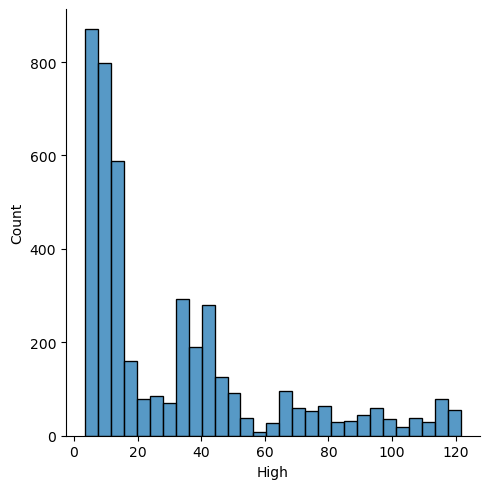

In [17]:
sns.displot(df['High'] )

C:\Users\dodiy\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='High', ylabel='Count'>

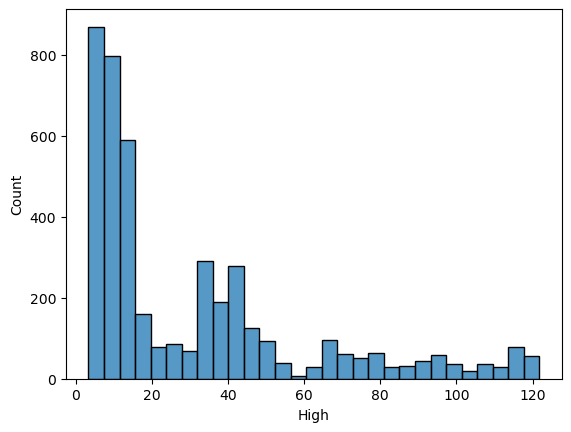

In [18]:
sns.histplot(df.High)

In [56]:
x = df.drop(['Close','Date','Adj_Close'] , axis=1)
y = df['Close']

In [57]:
x.shape

(4392, 4)

In [58]:
y.shape

(4392,)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [75]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score
import numpy as np
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from xgboost import XGBRegressor

In [77]:
def evaluate_model(y_test,y_pred):

  mse = mean_squared_error(y_test,y_pred)
  mae = mean_absolute_error(y_test,y_pred)
  rmse = np.sqrt(mean_squared_error(y_test,y_pred))
  r2 = r2_score(y_test,y_pred)

  return mae , rmse , r2

In [78]:
models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet(),
    'DecisionTree' : DecisionTreeRegressor(),
    "XGBRegressor" : XGBRegressor()
}

In [79]:
len(models)

6

In [80]:
models.items()

dict_items([('LinearRegression', LinearRegression()), ('Lasso', Lasso()), ('Ridge', Ridge()), ('Elasticnet', ElasticNet()), ('DecisionTree', DecisionTreeRegressor()), ('XGBRegressor', XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...))])

In [81]:
for model_name , model in models.items():
  model.fit(X_train,y_train)

  y_pred = model.predict(X_test)

  mae , rmse , r2 = evaluate_model(y_test,y_pred)

  print(model_name)
  print('MODEL TRAINING PERFORMANCE')
  print("RMSE:",rmse * 100)
  print('MAE:',mae * 100)
  print('R2:',r2*100)

  print('*'*35)
  print('🎆'*15)
  print('*'*35)
  print('\n')



LinearRegression
MODEL TRAINING PERFORMANCE
RMSE: 27.34022817458339
MAE: 14.340175111679834
R2: 99.99154711010173
***********************************
🎆🎆🎆🎆🎆🎆🎆🎆🎆🎆🎆🎆🎆🎆🎆
***********************************


Lasso
MODEL TRAINING PERFORMANCE
RMSE: 110.17106649499695
MAE: 84.3051097874514
R2: 99.86274251093317
***********************************
🎆🎆🎆🎆🎆🎆🎆🎆🎆🎆🎆🎆🎆🎆🎆
***********************************


Ridge
MODEL TRAINING PERFORMANCE
RMSE: 34.40305380609565
MAE: 18.820331003683844
R2: 99.98661572251196
***********************************
🎆🎆🎆🎆🎆🎆🎆🎆🎆🎆🎆🎆🎆🎆🎆
***********************************


Elasticnet
MODEL TRAINING PERFORMANCE
RMSE: 469.22368038139643
MAE: 372.88184527396544
R2: 97.51022107855766
***********************************
🎆🎆🎆🎆🎆🎆🎆🎆🎆🎆🎆🎆🎆🎆🎆
***********************************


DecisionTree
MODEL TRAINING PERFORMANCE
RMSE: 48.00856947565253
MAE: 24.574727379310335
R2: 99.9739361556507
***********************************
🎆🎆🎆🎆🎆🎆🎆🎆🎆🎆🎆🎆🎆🎆🎆
***********************************




C:\Users\dodiy\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.032e+02, tolerance: 2.643e+02
  model = cd_fast.enet_coordinate_descent(


XGBRegressor
MODEL TRAINING PERFORMANCE
RMSE: 41.917660247058144
MAE: 23.123004723089803
R2: 99.98013013075497
***********************************
🎆🎆🎆🎆🎆🎆🎆🎆🎆🎆🎆🎆🎆🎆🎆
***********************************




In [82]:
model_ridge = Ridge()
model_ridge.fit(X_train,y_train)
y_pred = model_ridge.predict(X_test)

In [83]:
MSE = mean_squared_error(y_test,y_pred) * 100
R2_SCORE = r2_score(y_test,y_pred) * 100
print('MSE = ',MSE)
print('R2-SCORE = ',R2_SCORE)

MSE =  11.835701111851124
R2-SCORE =  99.98661572251196


In [84]:
import joblib

In [85]:
joblib.dump(model_ridge , "model.joblib")

['model.joblib']

In [86]:
joblib.dump(scaler , "scaler.joblib")

['scaler.joblib']